# Simple Outdoors Test

## Objective

After evaluating the basic distance measuring capabilities of the TOF sensor, the objective of this notebook is to determine the sensor's effectiveness in detecting and measuring the distances of passing cars in a practical setting.

## Overview

- First, I started off by mounting the sensor on a stationary bike, and positioning it along a road to measure passing cars. I first wanted to determine the effectiveness of the sensor at detecting pass cars in a more controlled environment.
- Next, with the same set up, the bike was pedalled down different roads and the data from overtaking cars was collected. Being able consistently and reliably detect vehicles in this setting was the end goal of the experiment.

### Code

- As per the previous notebook, much of the code has been split into separate Python modules.
- [`data_loader`](./data_loader.py) contains helper functions to extract the data from the necessary files.
- [`preprocessing`](./preprocessing.py) contains utility functions that manipulate the data.

In [1]:
import pathlib

import matplotlib.pyplot as plt

from data_loader import get_data_from_txt
from graphing import OutdoorGraphs
from preprocessing import DataCleaner

In [2]:
graphs = OutdoorGraphs()
data_cleaner = DataCleaner()

## Stationary Test

- In the first test, the sensor was mounted on a stationary bike along Corporation Rd. which saw moderate traffic.
- I also mounted a GoPro to capture a video of the vehicles that pass the bike.
- I will proceed to extract and analyze the data collected from the TOF sensor, and compare it to the video feed to determine its reliability.

### Setup

- First, I create a graphs objects to help plot the graphs I want.
- Then, I extract the data into three lists: times, distances measured, and signal strength.

In [3]:
STATIONARY_TEST_PATH = pathlib.Path("./data/outdoor_tests/stationary_test.txt")

stationary_raw_data = get_data_from_txt(STATIONARY_TEST_PATH)
timing, distances, strength = stationary_raw_data
cleaned_distances = data_cleaner.clean_spurious_data(distances)

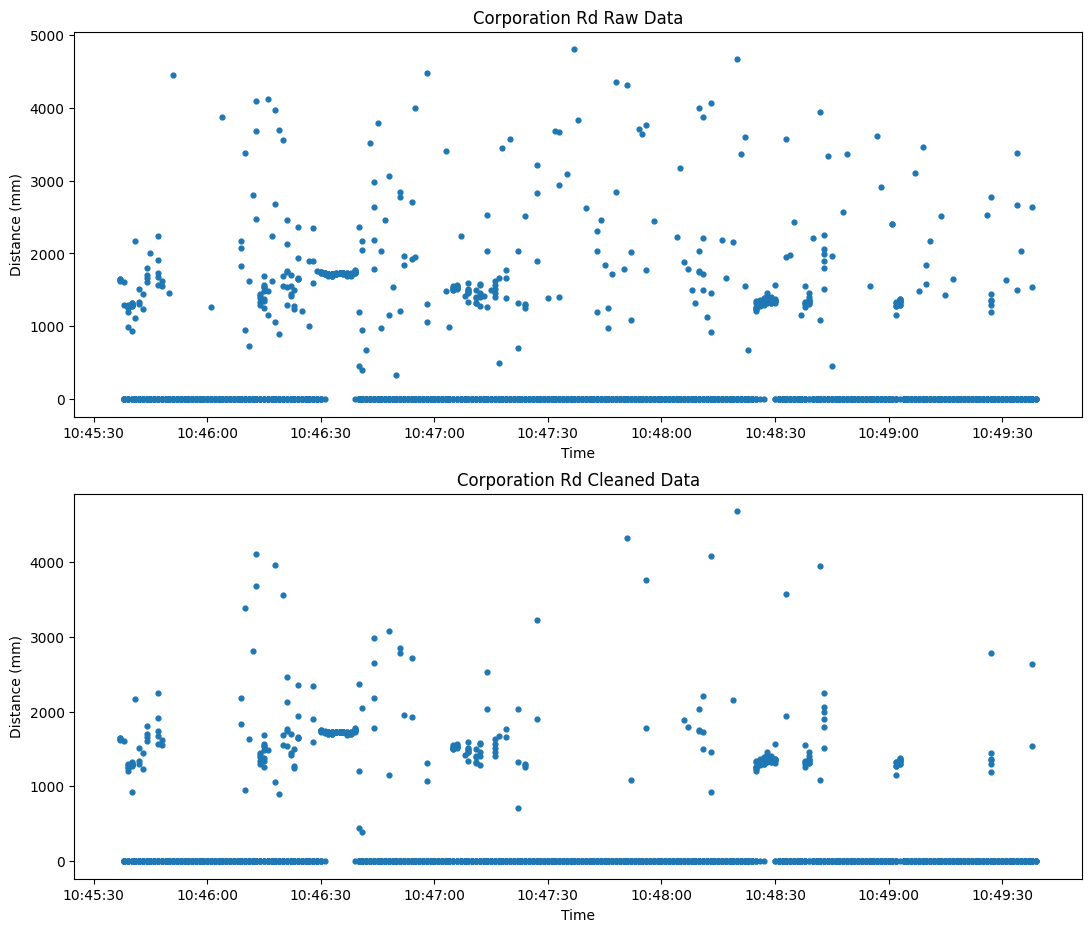

In [4]:
fig, axes = plt.subplots(2, figsize=(13, 11))
graphs.scatter_time_vs_distance(axes[0], timing, distances, title="Corporation Rd Raw Data")
graphs.scatter_time_vs_distance(axes[1], timing, cleaned_distances, title="Corporation Rd Cleaned Data")

## Cycling Tests

- Now, it was time to test the sensor on the road in real-world conditions.
- I mounted the sensor with its casing on a bike and rode it down different roads in Singapore.

### Setup

- Along with the sensor, a GoPro was attached to the bike which could be used to visually check when cars overtook the cyclist. With this, I could cross reference the data measured by the sensor and determine it's validity.
- I used the same functions for the simple outdoors tests to clean and extract the data and below, I define a few more helper functions.

### Lakeside Road

- I graph both the raw and cleaned data in two scatter plot graphs.
- From the first graph, we see how many spurious points there are and how it might be difficult to reliably determine with the sensor if a vehicle really passed the bike.
- In the second graph, I cleaned the data using the above algorithm and annotated it based on the GoPro's recording. I included the vehicles the sensor passed and a rough estimate of the distance from the bike.
- We see that there are 3 instances where it is obvious that a vehicle passed the bicycle. From the video recording, these 3 instances occured when the vehicles passed very closely to the bike.
- Other than these 3 points, the sensor did not pick up on vehciles that passed further from the bike, and even missed out on a bike which was too small to be sensed..

In [5]:
LAKESIDE_RD_PATH = pathlib.Path("./data/cycling_tests/lakeside_drive.txt")

timing, distances, signal_strengths = get_data_from_txt(LAKESIDE_RD_PATH)
cleaned_distances = data_cleaner.clean_spurious_data(distances)

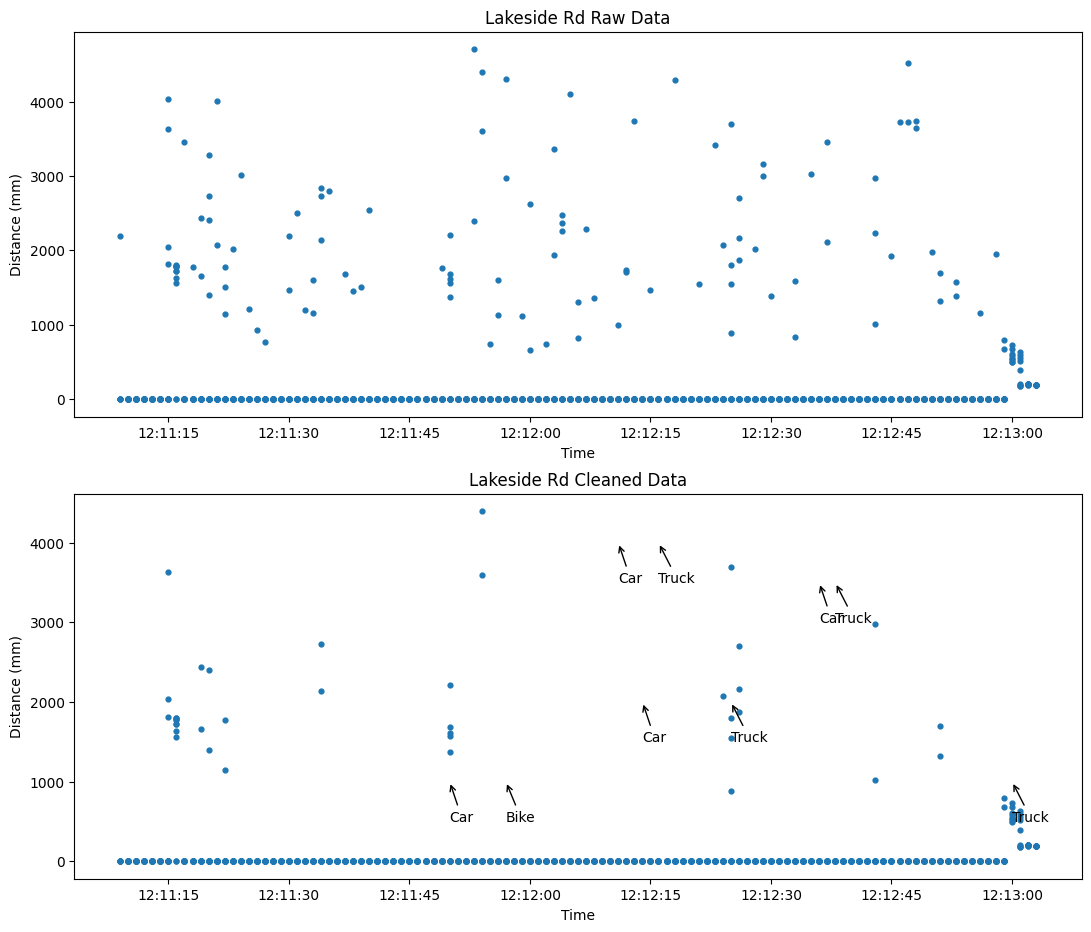

In [6]:
fig, axes = plt.subplots(2, figsize=(13, 11))
graphs.scatter_time_vs_distance(axes[0], timing, distances, title="Lakeside Rd Raw Data")
graphs.scatter_time_vs_distance(axes[1], timing, cleaned_distances, title="Lakeside Rd Cleaned Data")

graphs.annotate_graph(axes[1], "12:11:50", 1000, "Car")
graphs.annotate_graph(axes[1], "12:11:57", 1000, "Bike")
graphs.annotate_graph(axes[1], "12:12:11", 4000, "Car")
graphs.annotate_graph(axes[1], "12:12:14", 2000, "Car")
graphs.annotate_graph(axes[1], "12:12:16", 4000, "Truck")
graphs.annotate_graph(axes[1], "12:12:25", 2000, "Truck")
graphs.annotate_graph(axes[1], "12:12:36", 3500, "Car")
graphs.annotate_graph(axes[1], "12:12:38", 3500, "Truck")
graphs.annotate_graph(axes[1], "12:13:00", 1000, "Truck")

plt.show()